In [2]:
with open('sample.txt', 'r', encoding = 'utf-8') as f:
    docs = f.readlines()

for id, doc in enumerate(docs):
    print('[{}] : {}...'.format(id, doc[:30]))

[0] : BTS, also known as the Bangtan...
[1] : [5] The septet—consisting of m...
[2] : Originally a hip hop group, th...
[3] : Their lyrics, often focused on...
[4] : Their work also often referenc...
[5] : After debuting in 2013 with th...
[6] : The group's second Korean stud...
[7] : By 2017, BTS crossed into the ...
[8] : They became the first Korean g...
[9] : BTS became one of the few grou...
[10] : In 2020, BTS became the first ...
[11] : Their follow-up releases "Sava...
[12] : Having sold over 20 million al...
[13] : They are the first Asian and n...
[14] : Featured on Time's internation...
[15] : The group's numerous accolades...
[16] : Outside of music, they partner...


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf 벡터 메트릭스 생성
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(docs)
print('type of tfidf_matrix {}'.format(type(tfidf_matrix)))
print('shape of tfidf_matrix {}'.format(tfidf_matrix.shape))

type of tfidf_matrix <class 'scipy.sparse._csr.csr_matrix'>
shape of tfidf_matrix (17, 279)


In [4]:
vocab = sorted(tfidf.vocabulary_.items())
vocab[10:20]

[('2019', 10),
 ('2020', 11),
 ('24', 12),
 ('25', 13),
 ('45', 14),
 ('accolades', 15),
 ('accumulate', 16),
 ('act', 17),
 ('addressed', 18),
 ('after', 19)]

In [6]:
import pandas as pd

df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
print(df.head(5))

   100   20  200      2010  2010s      2013  2014  2016  2017  2018  ...  \
0  0.0  0.0  0.0  0.231975    0.0  0.202557   0.0   0.0   0.0   0.0  ...   
1  0.0  0.0  0.0  0.000000    0.0  0.000000   0.0   0.0   0.0   0.0  ...   
2  0.0  0.0  0.0  0.000000    0.0  0.000000   0.0   0.0   0.0   0.0  ...   
3  0.0  0.0  0.0  0.000000    0.0  0.000000   0.0   0.0   0.0   0.0  ...   
4  0.0  0.0  0.0  0.000000    0.0  0.000000   0.0   0.0   0.0   0.0  ...   

   wings  with      work  world    writes  year  years  youngest  yourself  \
0    0.0   0.0  0.000000    0.0  0.000000   0.0    0.0       0.0       0.0   
1    0.0   0.0  0.000000    0.0  0.224235   0.0    0.0       0.0       0.0   
2    0.0   0.0  0.000000    0.0  0.000000   0.0    0.0       0.0       0.0   
3    0.0   0.0  0.000000    0.0  0.000000   0.0    0.0       0.0       0.0   
4    0.0   0.0  0.286997    0.0  0.000000   0.0    0.0       0.0       0.0   

      youth  
0  0.000000  
1  0.000000  
2  0.000000  
3  0.184249  
4  0

# 1. 문서 별 키워드 추출

In [7]:
tfidf_table = tfidf_matrix.toarray()

keywords = []
for weight in tfidf_table:
    w_vec = list(enumerate(weight))
    w_vec = sorted(w_vec, key=lambda x : x[1], reverse=True)
    print(w_vec[:3])
    keywords.append(w_vec)

[(3, 0.23197531097458143), (43, 0.23197531097458143), (44, 0.23197531097458143)]
[(63, 0.4484693405096295), (67, 0.22423467025481475), (121, 0.22423467025481475)]
[(89, 0.2913728403081426), (105, 0.2913728403081426), (116, 0.2913728403081426)]
[(20, 0.36849717258087467), (178, 0.27450131318216087), (180, 0.22410956369129728)]
[(25, 0.28699683521736424), (28, 0.28699683521736424), (66, 0.28699683521736424)]
[(21, 0.3950821629525769), (143, 0.3503821312466642), (235, 0.31427634964973317)]
[(7, 0.30509746046439434), (70, 0.30509746046439434), (217, 0.30509746046439434)]
[(132, 0.47053339357158536), (241, 0.2610022040778573), (54, 0.23526669678579268)]
[(36, 0.28724185972682575), (241, 0.2712474009036821), (94, 0.22304852454237598)]
[(241, 0.294536606699032), (181, 0.28410989848189394), (30, 0.1991208889942173)]
[(50, 0.3419126164640681), (23, 0.2396324257354338), (83, 0.2396324257354338)]
[(247, 0.2297315157704796), (16, 0.21690472536686714), (57, 0.21690472536686714)]
[(48, 0.37155435286

In [26]:
print(f'3번 : {vocab[3]}\n43번 : {vocab[43]}\n44번 : {vocab[44]}\n\n')


print(f'21번 : {vocab[21]}\n143번 : {vocab[143]}\n\n')
print(f'89번 : {vocab[89]}\n105번 : {vocab[105]}\n\n')


3번 : ('2010', 3)
43번 : ('band', 43)
44번 : ('bangtan', 44)


21번 : ('album', 21)
143번 : ('language', 143)


89번 : ('evolved', 89)
105번 : ('genres', 105)




# 2. 랭킹

## 2 - 1 문장 랭킹

In [9]:
import numpy as np
def tfidf_rank(tfidf_matrix):
    rank = []
    avg, stddev = 0.0, 0.0
    #문서 별 tfidf 가중치의 합 계산 : (문서id, 가중치 합)
    for idx, tfidf in enumerate(tfidf_matrix):
        rank.append((idx, tfidf.sum()))

    #가중치의 합이 높은 문서 순으로 정렬    
    rank.sort(key=lambda x : x[1], reverse=True)

    #tfidf의 평균과 표준편차 계산
    tfidf_sum = [tfidf.sum() for tfidf in tfidf_matrix]
    avg = np.mean(tfidf_sum)
    stddev = np.std(tfidf_sum)
    return rank, avg, stddev

rank, avg, stddev = tfidf_rank(tfidf_matrix)

print(rank[:2])
print('avg = {}, stddev = {}'.format(avg, stddev))

#랭크가 높은 문서 2개의 원문을 추출하여 rank_doc에 저장 후 출력
rank_doc = [docs[doc_id[0]] for doc_id in rank[:2]]
print(rank_doc)

[(13, 6.693423095412073), (16, 6.186613095039842)]
avg = 4.853519357129592, stddev = 0.8320478309229977
["They are the first Asian and non-English speaking act to be named International Federation of the Phonographic Industry (IFPI) Global Recording Artist of the Year (2020), to chart on Billboard's Top Touring Artists of the 2010s (placing at number 45), and to headline and sell out Wembley Stadium and Rose Bowl Stadium (Love Yourself World Tour in 2019).\n", 'Outside of music, they partnered with UNICEF to establish the Love Myself anti-violence campaign, addressed three United Nations General Assemblies, and became the youngest ever recipients of the Order of Cultural Merit from the President of South Korea due to their contributions in spreading Korean culture and language.']


## 2 - 2 단어 랭킹

In [13]:
df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
result = df.sum()
result = result.sort_values(ascending=False)
print(result[:10])

the       2.574203
and       1.713037
of        1.610464
to        1.371285
their     1.250107
in        1.210924
korean    1.055683
on        0.980620
album     0.968351
first     0.884761
dtype: float64


In [18]:
tfidf2 = TfidfVectorizer(stop_words='english')
tfidf_matrix2 = tfidf2.fit_transform(docs)
print('shape of tfidf_matrix2 = {}'.format(tfidf_matrix2.shape))

df = pd.DataFrame(tfidf_matrix2.toarray(), columns=tfidf2.get_feature_names_out())
result = df.sum()
result = result.sort_values(ascending=False)
print(result[:10])

shape of tfidf_matrix2 = (17, 222)
korean       1.313829
album        1.164872
bts          1.078723
south        1.007459
billboard    0.845713
studio       0.818018
love         0.784407
group        0.782621
music        0.765502
awards       0.738452
dtype: float64


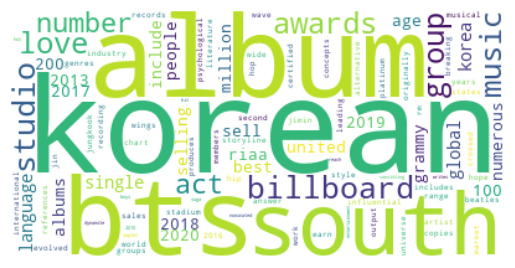

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(result)

plt.imshow(Cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 3. 문서 유사도 계산

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

def cosine_sim_rank(tfidf_matrix):
    #1. 코사인 유사도 계산
    cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    #cos_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
    print('shape of cos_sim table {}'.format(cos_sim.shape))
    
    #2. 유사도가 높은 문서 쌍 순으로 정렬
    sim_scores = []
    for idx, sim in enumerate(cos_sim):
        sim = list(enumerate(sim))
        sim = sorted(sim, key=lambda x: x[1], reverse=True)
        sim_scores.append(((idx, sim[1][0]), sim[1][1]))
    
    sim_scores.sort(key=lambda x : x[1], reverse=True)
    return sim_scores

sim_scores = cosine_sim_rank(tfidf_matrix)
print(sim_scores)

shape of cos_sim table (17, 17)
[((8, 10), 0.33726863252138756), ((10, 8), 0.33726863252138756), ((9, 8), 0.3011090461223652), ((13, 8), 0.2714798133475461), ((5, 6), 0.24882604511929546), ((6, 5), 0.24882604511929546), ((16, 8), 0.23609277060128028), ((12, 6), 0.2241844040049017), ((14, 13), 0.2129222576840272), ((11, 9), 0.20533428710742477), ((3, 14), 0.16560870640209846), ((0, 12), 0.16468801043745132), ((7, 9), 0.14369019524697718), ((1, 16), 0.1189618772561185), ((15, 7), 0.10008635253045675), ((4, 3), 0.09522662738619718), ((2, 8), 0.09362561003266479)]


In [31]:
print(f'8번 문서:\n{docs[8]}')
print(f'10번 문서:\n{docs[10]}')

8번 문서:
They became the first Korean group to receive a certification from the Recording Industry Association of America (RIAA) for their single "Mic Drop", as well as the first Korean act to top the US Billboard 200 with their studio album Love Yourself: Tear (2018).

10번 문서:
In 2020, BTS became the first all-South Korean act to reach number one on the Billboard Global 200 and US Billboard Hot 100 with their Grammy-nominated single "Dynamite".



In [33]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
pd.DataFrame(cos_sim)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,0.021340,0.000000,0.029224,0.059047,0.112296,0.135950,0.058618,0.096438,0.107047,0.103473,0.027872,0.164688,0.052855,0.104759,0.016430,0.074601
1,0.021340,1.000000,0.046464,0.115337,0.049225,0.031911,0.024263,0.036071,0.060695,0.058659,0.041101,0.030552,0.054728,0.100453,0.075911,0.026470,0.118962
2,0.000000,0.046464,1.000000,0.051419,0.018222,0.025477,0.089546,0.000000,0.093626,0.030580,0.034796,0.049220,0.013350,0.066136,0.055863,0.063957,0.083071
3,0.029224,0.115337,0.051419,1.000000,0.095227,0.031276,0.027624,0.053350,0.076685,0.082332,0.084546,0.065597,0.102135,0.150609,0.165609,0.034800,0.151519
4,0.059047,0.049225,0.018222,0.095227,1.000000,0.040843,0.019080,0.018467,0.022936,0.015630,0.033796,0.030590,0.014582,0.045071,0.050848,0.027103,0.035454
5,0.112296,0.031911,0.025477,0.031276,0.040843,1.000000,0.248826,0.031334,0.208543,0.112640,0.144573,0.070302,0.125749,0.040613,0.032079,0.009474,0.110331
6,0.135950,0.024263,0.089546,0.027624,0.019080,0.248826,1.000000,0.047150,0.242247,0.227983,0.188244,0.094269,0.224184,0.121197,0.043339,0.034012,0.141087
7,0.058618,0.036071,0.000000,0.053350,0.018467,0.031334,0.047150,1.000000,0.092076,0.143690,0.118264,0.042225,0.122982,0.094610,0.120968,0.100086,0.130423
8,0.096438,0.060695,0.093626,0.076685,0.022936,0.208543,0.242247,0.092076,1.000000,0.301109,0.337269,0.141334,0.129099,0.271480,0.124733,0.073682,0.236093
9,0.107047,0.058659,0.030580,0.082332,0.015630,0.112640,0.227983,0.143690,0.301109,1.000000,0.248100,0.205334,0.177006,0.185391,0.122484,0.054417,0.175005


In [25]:
test = ['first korean artist']
test_matrix = tfidf.transform(test)
print(test_matrix)

  (0, 34)	0.7435861803609287
  (0, 94)	0.5179080778675506
  (0, 142)	0.4229075729468363


In [23]:
sim = cosine_similarity(test_matrix, tfidf_matrix)
print(sim.shape)
sim = sim[0]
sim = [(id, cos) for id, cos in enumerate(sim)]
sim = sorted(sim, key=lambda x: x[1], reverse=True)
print(docs[sim[0][0]])
print(sim)

(1, 17)
They became the first Korean group to receive a certification from the Recording Industry Association of America (RIAA) for their single "Mic Drop", as well as the first Korean act to top the US Billboard 200 with their studio album Love Yourself: Tear (2018).

[(8, 0.1925446767370766), (6, 0.1601758304665819), (12, 0.1596398201976852), (13, 0.13841967513319248), (10, 0.12580675938918232), (5, 0.10533325157928757), (9, 0.10453824725170063), (7, 0.04941114574069588), (0, 0.048719882819813), (16, 0.03391929771232008), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (11, 0.0), (14, 0.0), (15, 0.0)]
